#   第7讲 逻辑回归

In [1]:
##数据说明：本数据是一份汽车贷款违约数据
##名称	中文含义
##application_id	申请者ID
##account_number	帐户号
##bad_ind	是否违约
##vehicle_year	汽车购买时间
##vehicle_make	汽车制造商
##bankruptcy_ind	曾经破产标识
##tot_derog	五年内信用不良事件数量(比如手机欠费消号)
##tot_tr	全部帐户数量
##age_oldest_tr	最久账号存续时间(月)
##tot_open_tr	在使用帐户数量
##tot_rev_tr	在使用可循环贷款帐户数量(比如信用卡)
##tot_rev_debt	在使用可循环贷款帐户余额(比如信用卡欠款)
##tot_rev_line	可循环贷款帐户限额(信用卡授权额度)
##rev_util	可循环贷款帐户使用比例(余额/限额)
##fico_score	FICO打分
##purch_price	汽车购买金额(元)
##msrp	建议售价
##down_pyt	分期付款的首次交款
##loan_term	贷款期限(月)
##loan_amt	贷款金额
##ltv	贷款金额/建议售价*100
##tot_income	月均收入(元)
##veh_mileage	行使历程(Mile)
##used_ind	是否二手车
##weight	样本权重

accepts<-read.csv("data/accepts.csv",fileEncoding="GBK")

head(accepts)

application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,⋯,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
2314049,11613,1,1998,FORD,N,7,9,64,2,⋯,650,17200.00,17350,0.00,36,17200.00,99,6550.00,24000,1
63539,13449,0,2000,DAEWOO,N,0,21,240,11,⋯,649,19588.54,19788,683.54,60,19588.54,99,4666.67,22,0
7328510,14323,1,1998,PLYMOUTH,N,7,10,60,NA,⋯,613,13595.00,11450,0.00,60,10500.00,92,2000.00,19600,1
8725187,15359,1,1997,FORD,N,3,10,35,5,⋯,603,12999.00,12100,3099.00,60,10800.00,118,1500.00,10000,1
4275127,15812,0,2000,TOYOTA,N,0,10,104,2,⋯,764,26328.04,22024,0.00,60,26328.04,122,4144.00,14,0
8712513,16979,0,2000,DODGE,Y,2,15,136,4,⋯,680,26272.72,26375,0.00,36,26272.72,100,5400.00,1,0


In [2]:
accepts<-na.omit(accepts)

attach(accepts)

#   7.1 分类变量的相关关系


In [5]:
#曾经破产标识与是否违约是否有关系?
table(bad_ind)
table(bankruptcy_ind)
table(bad_ind,bankruptcy_ind)

bad_ind
   0    1 
3524  830 

bankruptcy_ind
        N    Y 
   0 4035  319 

       bankruptcy_ind
bad_ind         N    Y
      0    0 3274  250
      1    0  761   69

In [6]:
#对于两分类变量的列联表分析，使用prettyR包中的xtab函数
library(prettyR)

In [7]:
xtab(~ bankruptcy_ind+bad_ind,data = accepts)

Crosstabulation of bankruptcy_ind by bad_ind 
	bad_ind
bankruptcy_ind      0      1
       0      0      0
     NaN    NaN      -
       0      0      0

N   3274    761   4035
   81.14  18.86      -
   92.91  91.69  92.67

Y    250     69    319
   78.37  21.63      -
    7.09   8.31   7.33

    3524    830   4354
   80.94  19.06 100.00


In [8]:
chisq.test(x=bankruptcy_ind,y=bad_ind)


	Pearson's Chi-squared test with Yates' continuity correction

data:  bankruptcy_ind and bad_ind
X-squared = 1.2962, df = 1, p-value = 0.2549


In [9]:
xtab(~bankruptcy_ind+bad_ind,data = accepts,chisq = T)

Crosstabulation of bankruptcy_ind by bad_ind 
	bad_ind
bankruptcy_ind      0      1
       0      0      0
     NaN    NaN      -
       0      0      0

N   3274    761   4035
   81.14  18.86      -
   92.91  91.69  92.67

Y    250     69    319
   78.37  21.63      -
    7.09   8.31   7.33

    3524    830   4354
   80.94  19.06 100.00


Warning message in chisq.test(x$counts, ...):
“Chi-squared approximation may be incorrect”

X2[2]=NaN, p=NaN



##    7.2 逻辑回归

In [10]:
set.seed(100)
select<-sample(1:nrow(accepts),length(application_id)*0.7)
train<-accepts[select,]
test<-accepts[-select,]
attach(train)


The following objects are masked from accepts:

    account_number, age_oldest_tr, application_id, bad_ind,
    bankruptcy_ind, down_pyt, fico_score, loan_amt, loan_term, ltv,
    msrp, purch_price, rev_util, tot_derog, tot_income, tot_open_tr,
    tot_rev_debt, tot_rev_line, tot_rev_tr, tot_tr, used_ind,
    vehicle_make, vehicle_year, veh_mileage



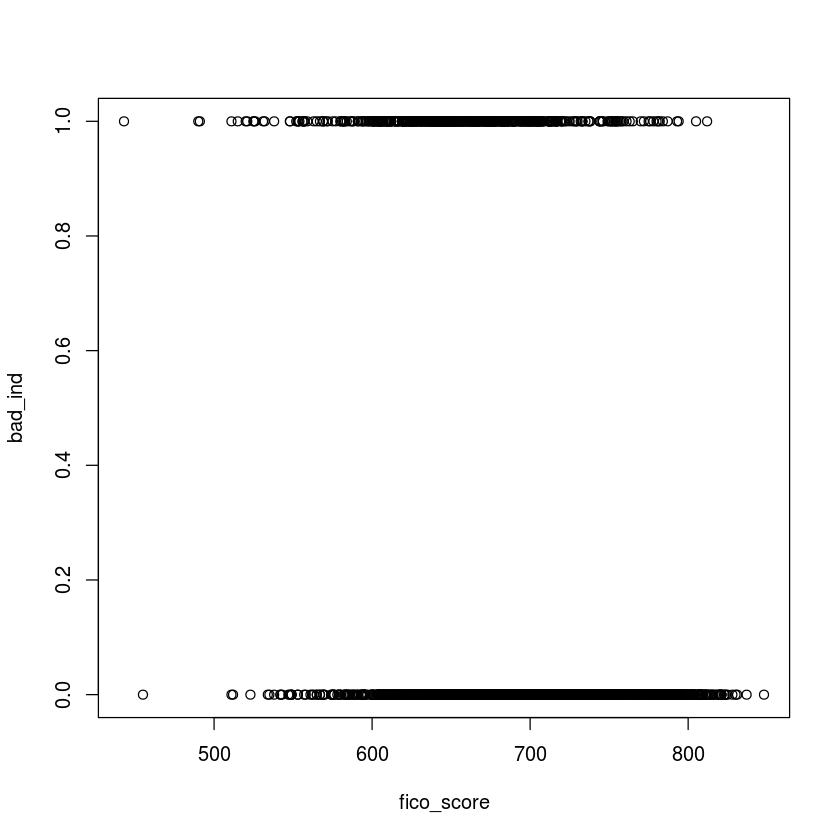

In [11]:
plot(fico_score,bad_ind)

In [13]:
lg<-glm(bad_ind~fico_score,family=binomial(link="logit"))

summary(lg)


Call:
glm(formula = bad_ind ~ fico_score, family = binomial(link = "logit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0490  -0.6854  -0.4995  -0.3117   2.6137  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  8.7877278  0.6187978   14.20   <2e-16 ***
fico_score  -0.0149876  0.0009217  -16.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3011.9  on 3046  degrees of freedom
Residual deviance: 2696.2  on 3045  degrees of freedom
AIC: 2700.2

Number of Fisher Scoring iterations: 5


In [14]:
lg<-glm(bad_ind ~fico_score+bankruptcy_ind+tot_derog+age_oldest_tr+rev_util+ltv+veh_mileage,family=binomial(link='logit'))
summary(lg)


Call:
glm(formula = bad_ind ~ fico_score + bankruptcy_ind + tot_derog + 
    age_oldest_tr + rev_util + ltv + veh_mileage, family = binomial(link = "logit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5219  -0.6763  -0.4425  -0.2180   3.0337  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      5.254e+00  7.914e-01   6.639 3.17e-11 ***
fico_score      -1.373e-02  1.121e-03 -12.244  < 2e-16 ***
bankruptcy_indY -5.487e-01  1.906e-01  -2.878   0.0040 ** 
tot_derog        3.744e-02  1.591e-02   2.353   0.0186 *  
age_oldest_tr   -3.498e-03  6.139e-04  -5.699 1.21e-08 ***
rev_util         1.249e-03  5.850e-04   2.135   0.0328 *  
ltv              3.002e-02  3.407e-03   8.812  < 2e-16 ***
veh_mileage      4.708e-07  1.440e-06   0.327   0.7436    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3011.9  on 3046  degrees of freedom


In [15]:
lg_ms<-step(lg,direction = "both")
summary(lg_ms)

Start:  AIC=2566.33
bad_ind ~ fico_score + bankruptcy_ind + tot_derog + age_oldest_tr + 
    rev_util + ltv + veh_mileage

                 Df Deviance    AIC
- veh_mileage     1   2550.4 2564.4
<none>                2550.3 2566.3
- tot_derog       1   2555.8 2569.8
- rev_util        1   2555.8 2569.8
- bankruptcy_ind  1   2559.2 2573.2
- age_oldest_tr   1   2585.6 2599.6
- ltv             1   2634.8 2648.8
- fico_score      1   2713.1 2727.1

Step:  AIC=2564.43
bad_ind ~ fico_score + bankruptcy_ind + tot_derog + age_oldest_tr + 
    rev_util + ltv

                 Df Deviance    AIC
<none>                2550.4 2564.4
+ veh_mileage     1   2550.3 2566.3
- tot_derog       1   2555.9 2567.9
- rev_util        1   2555.9 2567.9
- bankruptcy_ind  1   2559.3 2571.3
- age_oldest_tr   1   2585.7 2597.7
- ltv             1   2636.0 2648.0
- fico_score      1   2714.1 2726.1



Call:
glm(formula = bad_ind ~ fico_score + bankruptcy_ind + tot_derog + 
    age_oldest_tr + rev_util + ltv, family = binomial(link = "logit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5179  -0.6775  -0.4410  -0.2164   3.0326  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      5.2653435  0.7907636   6.659 2.77e-11 ***
fico_score      -0.0137435  0.0011197 -12.275  < 2e-16 ***
bankruptcy_indY -0.5501408  0.1905979  -2.886   0.0039 ** 
tot_derog        0.0375763  0.0159036   2.363   0.0181 *  
age_oldest_tr   -0.0035001  0.0006140  -5.701 1.19e-08 ***
rev_util         0.0012479  0.0005844   2.135   0.0327 *  
ltv              0.0301192  0.0033946   8.873  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3011.9  on 3046  degrees of freedom
Residual deviance: 2550.4  on 3040  degrees of freedom
AIC: 2564.4

Numbe

In [16]:
train$lg_p<-predict(lg_ms, train) 
summary(train$lg_p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.3530 -2.5350 -1.6610 -1.7720 -0.9453  3.1270 

In [17]:
train$p<-1/(1+exp(-1*train$lg_p))
summary(train$p)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001739 0.073420 0.159600 0.195600 0.279800 0.958000 

In [18]:
library(car)
vif(lg)

fico_score bankruptcy_ind      tot_derog  age_oldest_tr       rev_util 
      1.340269       1.157063       1.434448       1.077331       1.044713 
           ltv    veh_mileage 
      1.050800       1.010791

#   7.3 模型评估

In [20]:
#对分类数据预测需要加上bad_ind参数 
test$lg_p<-predict(lg_ms, test) 
test$p<-(1/(1+exp(-1*test$lg_p)))
summary(test$p)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.002851 0.069840 0.154600 0.190100 0.272200 0.932300 

In [21]:
test$out<-1
test[test$p<0.2,]$out<-0
table(test$bad_ind,test$out)

   
      0   1
  0 728 345
  1  62 172

In [22]:
#7.3.1计算准确率
rate2<-sum(test$out==test$bad_ind)/length(test$bad_ind)

rate2

[1] 0.6885998

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



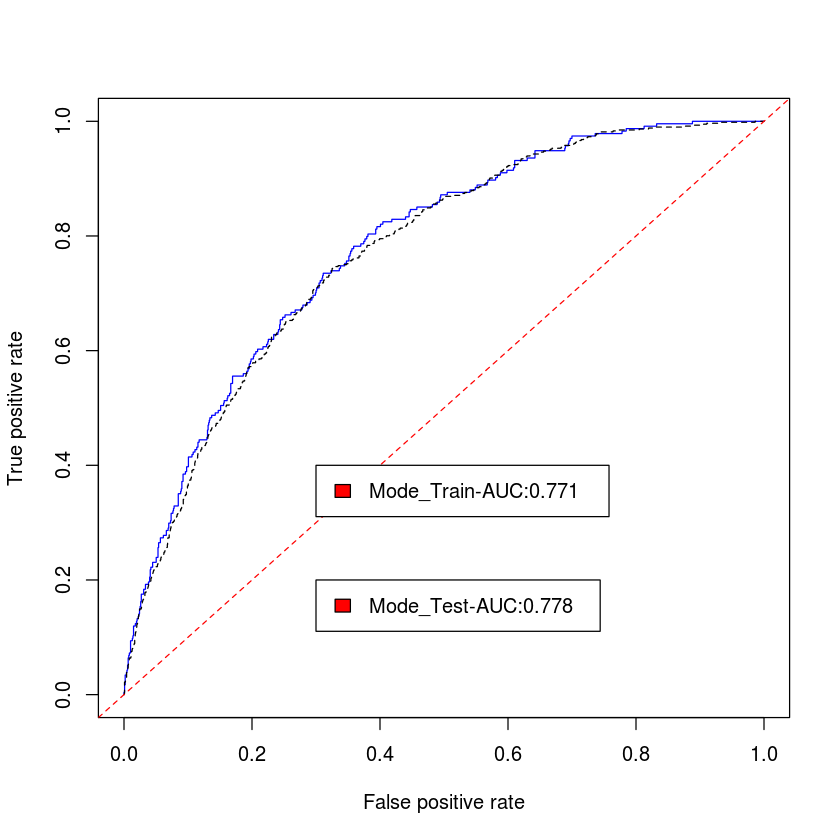

In [23]:
#7.3.2绘制ROC曲线
#旧方法
library(ROCR)
pred_Te <- prediction(test$p, test$bad_ind)
perf_Te <- performance(pred_Te,"tpr","fpr")
pred_Tr <- prediction(train$p, train$bad_ind)
perf_Tr <- performance(pred_Tr,"tpr","fpr")
plot(perf_Te, col='blue',lty=1);
plot(perf_Tr, col='black',lty=2,add=TRUE);
abline(0,1,lty=2,col='red')

lr_m_auc<-round(as.numeric(performance(pred_Tr,'auc')@y.values),3)
lr_m_str<-paste("Mode_Train-AUC:",lr_m_auc,sep="")
legend(0.3,0.4,c(lr_m_str),2:8)

lr_m_auc<-round(as.numeric(performance(pred_Te,'auc')@y.values),3)
lr_m_ste<-paste("Mode_Test-AUC:",lr_m_auc,sep="")
legend(0.3,0.2,c(lr_m_ste),2:8)

Area under the curve: 0.7708

Area under the curve: 0.7782


	DeLong's test for two ROC curves

data:  r1 and r2
D = -0.39401, df = 2426.3, p-value = 0.6936
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.7708099   0.7781641 


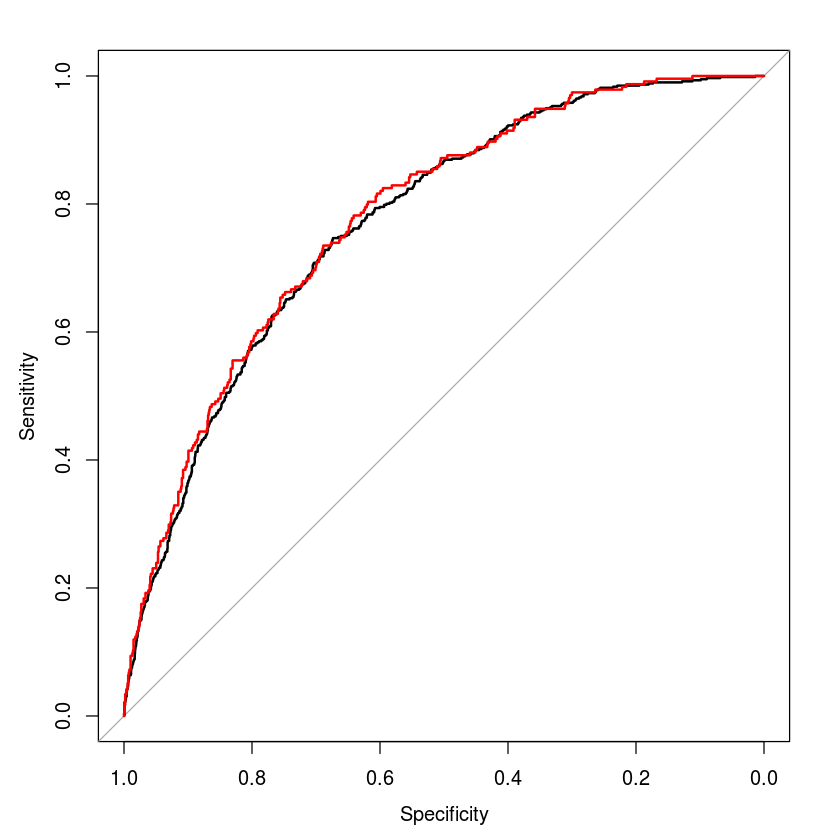

In [26]:
#新方法
library(pROC)
plot.roc(bad_ind~p,train,col="1")->r1
rocobjtr<- roc(train$bad_ind, train$p)
auc(rocobjtr)
lines.roc(bad_ind~p,test,col='2')->r2
rocobjte <- roc(test$bad_ind, test$p)
auc(rocobjte)
roc.test(r1,r2)

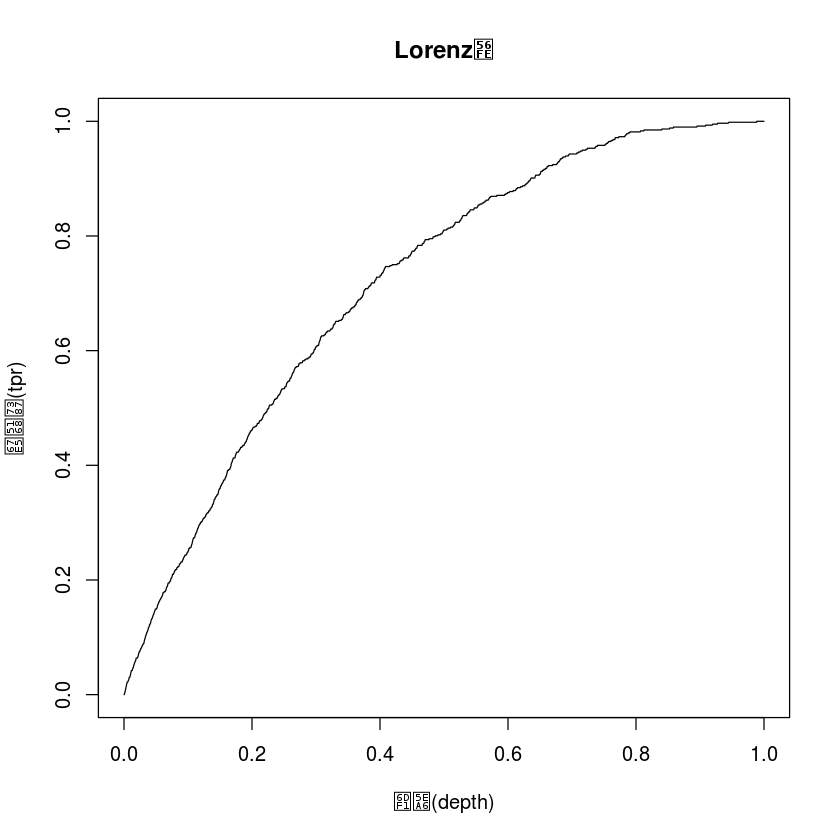

In [27]:

#7.3.3绘制洛伦兹曲线
pred_Tr <- prediction(train$p, train$bad_ind)
tpr <- performance(pred_Tr,measure='tpr')@y.values[[1]]
depth <- performance(pred_Tr,measure='rpp')@y.values[[1]]
plot(depth,tpr,type='l',main='Lorenz图',ylab='查全率(tpr)',xlab='深度(depth)')

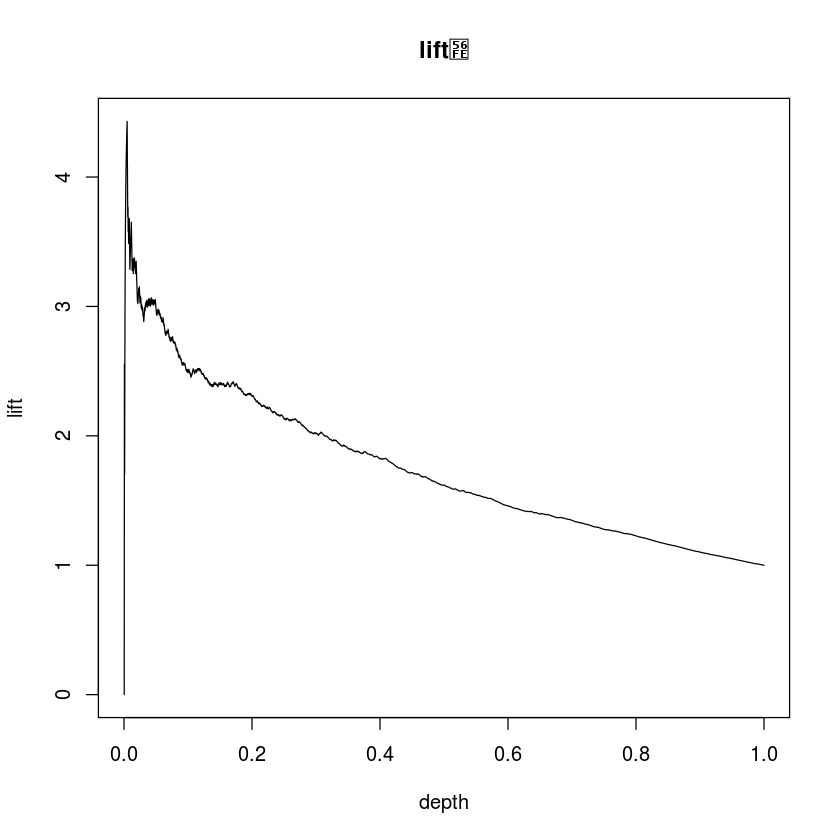

In [28]:
#7.3.4绘制累积提升度曲线
library(ROCR)
pred_Tr <- prediction(train$p, train$bad_ind)
lift <- performance(pred_Tr,measure='lift')@y.values[[1]]
depth <- performance(pred_Tr,measure='rpp')@y.values[[1]]
plot(depth,lift,type='l',main='lift图',ylab='lift',xlab='depth')

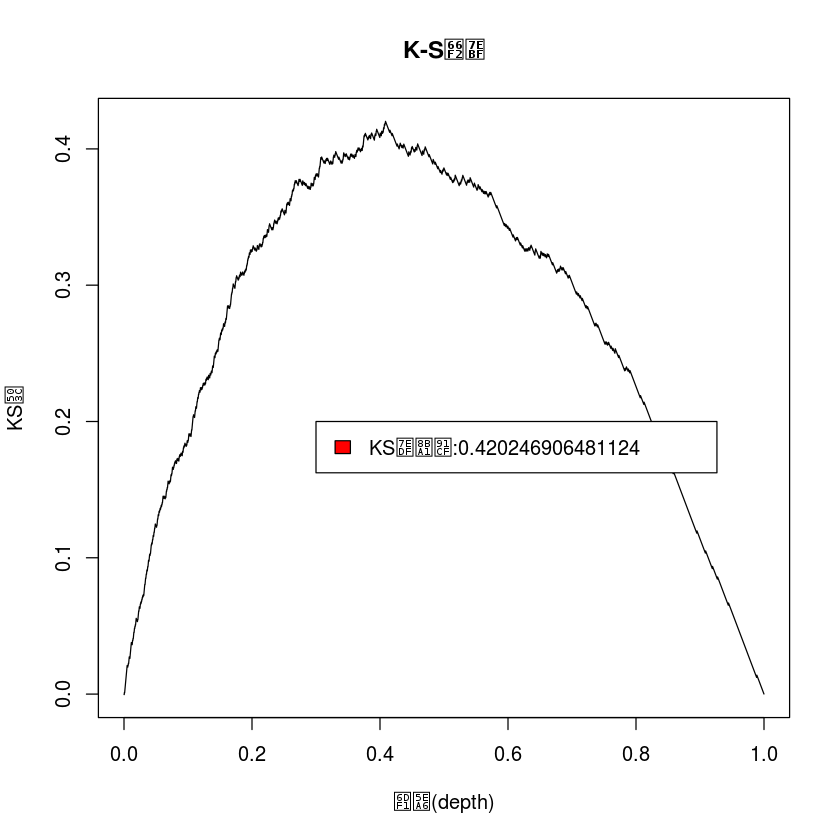

In [29]:
#7.3.5绘制K-S曲线
pred_Tr <- prediction(train$p, train$bad_ind)
tpr <- performance(pred_Tr,measure='tpr')@y.values[[1]]
fpr <- performance(pred_Tr,measure='fpr')@y.values[[1]]
ks<-(tpr-fpr)
depth <- performance(pred_Tr,measure='rpp')@y.values[[1]]
plot(depth,ks,type='l',main='K-S曲线',ylab='KS值',xlab='深度(depth)')
kslable<-paste("KS统计量:",max(ks),sep="")
legend(0.3,0.2,c(kslable),2:8)